## PS3 Discussion: Statistical Significance 

### PS 3 Week 7 Discussion - Clara Hu

Today, we're going reinforce our understanding of uncertainty and statistical significance.
_______

Let's take a look at an experiment where students in a large course were randomly assigned to attend section. 

Our dataset shows a hypothetical scenario in which we can observe *both* the potential outcome under **treatment** (randomly assigned to attend section) and potential outcome under **control** (randomly assigned to not attend section).

In [1]:
section_experiment <- read.csv("data/section_attd_experiment.csv")
head(section_experiment)

,X,ID,po_treatment,po_control
,<int>,<int>,<dbl>,<dbl>
1,1,1,99.17134,19.912313
2,2,2,86.76851,37.099465
3,3,3,96.41369,6.657836
4,4,4,73.71043,24.788116
5,5,5,99.60116,43.462295
6,6,6,86.50073,41.477766


In reality, we can't observe both the potential outcome under treatment and the potential outcome under control. That's why running *randomized* experiments are important. 

In this case, we are running an experiment to find out if attending section has an effect on coure grades.

### Creating Hypotheses

1. Null Hypothesis: ...
2. Alternative Hypothesis: ...

### Sampling

In the cell below, we randomly sample 300 people and randomly assign 150 to attend section and 150 to not attend section. This runs our experiment using one sample.

In [2]:
section_experiment_draw1 <- section_experiment
# We randomly assign people to the two groups here
section_experiment_draw1$assignment <- sample(c(rep("section", 150), rep("nosection", 150)), replace = F)
# Create a new variable representing what we would observe
section_experiment_draw1$po_observed <- ifelse(section_experiment_draw1$assignment == "section", section_experiment_draw1$po_treatment,
                                        section_experiment_draw1$po_control)

# Get rid of the potential outcome variables that we can't actually observe
section_experiment_draw1$po_treatment <- NULL
section_experiment_draw1$po_control <- NULL

# This is what we would actually observe in reality
head(section_experiment_draw1)

,X,ID,assignment,po_observed
,<int>,<int>,<chr>,<dbl>
1,1,1,section,99.171337
2,2,2,section,86.768511
3,3,3,nosection,6.657836
4,4,4,nosection,24.788116
5,5,5,nosection,43.462295
6,6,6,section,86.500726


Let's take a look at our sample. The code plots the distribution and finds the mean and the standard deviation of the grades of the people in the sample. 

[1] 58.67873

[1] 34.8937

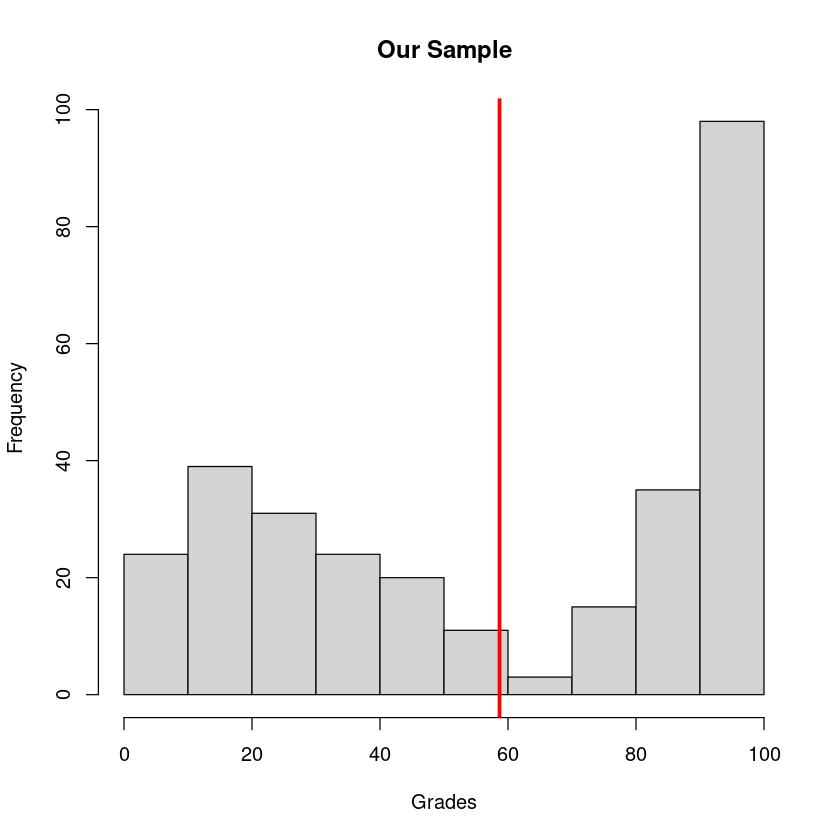

In [3]:
#plot
hist(section_experiment_draw1$po_observed, main = "Our Sample", xlab = "Grades")
abline(v = mean(section_experiment_draw1$po_observed), col = "red", lwd = 3) #line showing mean

mean(section_experiment_draw1$po_observed) #find mean
sd(section_experiment_draw1$po_observed) #find sd

**Questions:**

1. Is this distribution normal?

2. Is the distribution here a sampling distribution?

Using the code below, we once again randomly sample 300 people with 150 to attend section and 150 to not attend section. However, rather than doing this once, we are now sampling 1000 times. Let's save the mean grade from each sample, and then plot the means from the 1000 draws.

[1] 59.43544

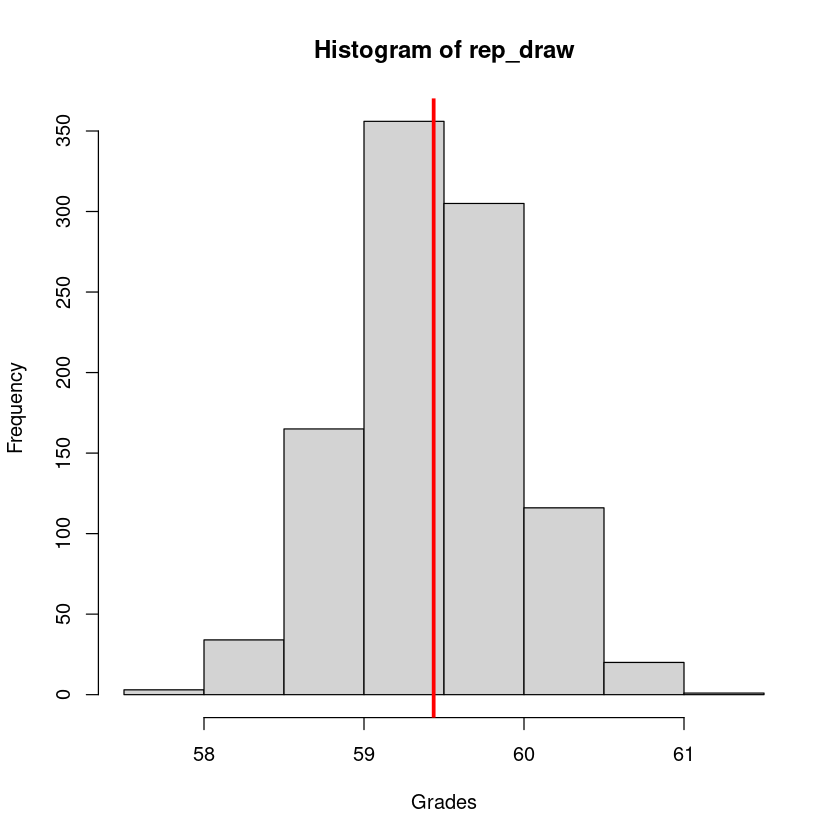

In [4]:
# This code randomly selects samples of size 300
# We are now saving the mean of each of the 1000 draws to a value in rep_draw.
rep_draw <- as.numeric()
for (i in 1:1000){
    section_experiment_treat_subset <- section_experiment$po_treatment[sample(x=1:300, size = 150, replace = F)]
    section_experiment_control_subset <- section_experiment$po_control[sample(x=1:300, size = 150, replace = F)]
    section_experiment_subset <- c(section_experiment_treat_subset, section_experiment_control_subset)
    rep_draw[i] <- mean(section_experiment_subset)
}
hist(rep_draw, xlab = "Grades")
abline(v = mean(rep_draw), col = "red", lwd = 3)
mean(rep_draw)

**Questions:**

1. Is the distribution normal?

2. Is the distribution here a sampling distribution?

Let's find the standard error. Recall that the standard error is the standard deviation of a sampling distribution.

In [5]:
# Find the SE of the distribution below
sd(rep_draw)

[1] 0.5153873

Let's return to our sample (`section_experiment_draw1`) and examine our treatment and control groups more carefully by separating them into subsets.

In [6]:
# Let's make two subsets, one for treatment and one for control
section_exp_section <- subset(section_experiment_draw1, assignment == "section")
section_exp_nosection <- subset(section_experiment_draw1, assignment == "nosection")

# For the control group
print("No section group: sample mean and sd") 
mean(section_exp_nosection$po_observed)
sd(section_exp_nosection$po_observed)

# For the treatment group
print("Section group: sample mean and sd")
mean(section_exp_section$po_observed)
sd(section_exp_section$po_observed)

[1] "No section group: sample mean and sd"


[1] 26.11559

[1] 15.63306

[1] "Section group: sample mean and sd"


[1] 91.24187

[1] 7.998112

**Visualize the distributions for the two groups**

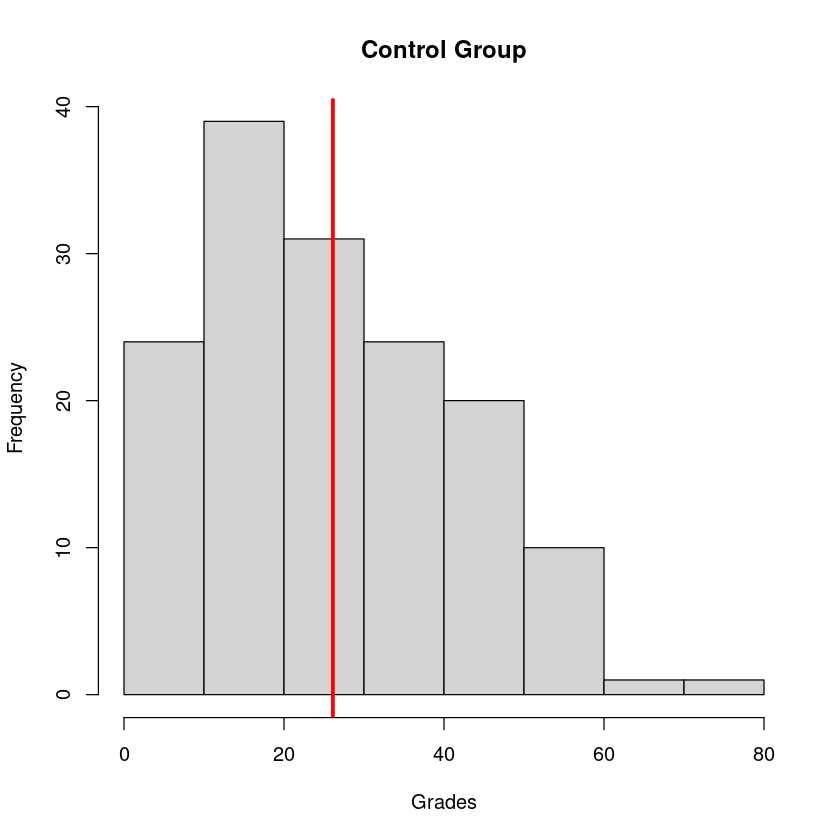

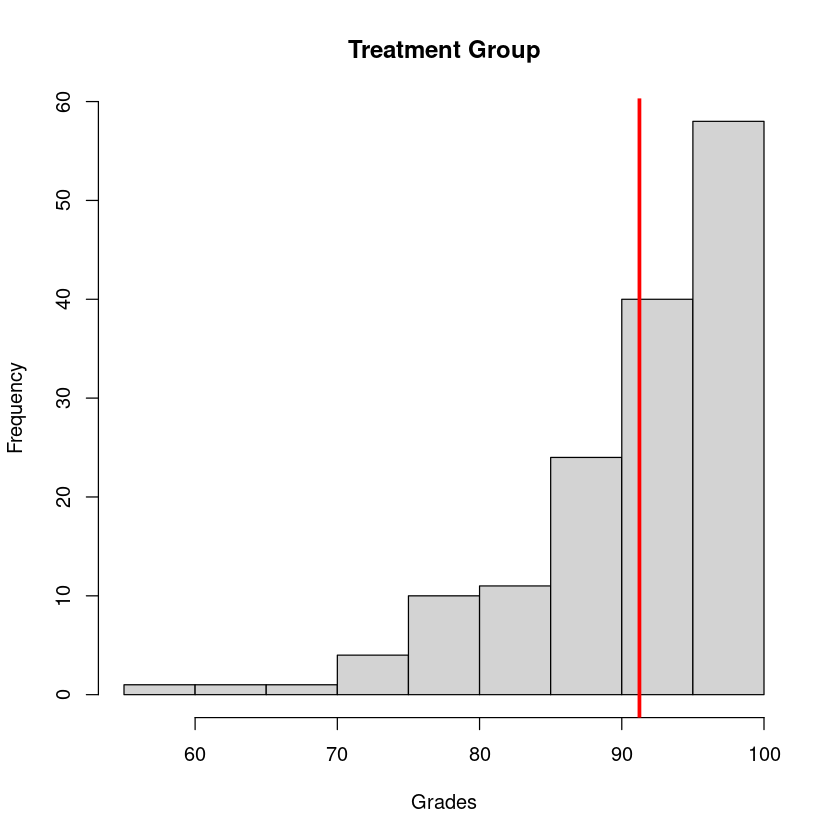

In [7]:
#Control subset
hist(section_exp_nosection$po_observed, main = "Control Group", xlab = "Grades")
abline(v = mean(section_exp_nosection$po_observed), col = "red", lwd = 3)

#Treatment subset
hist(section_exp_section$po_observed, main = "Treatment Group", xlab = "Grades")
abline(v = mean(section_exp_section$po_observed), col = "red", lwd = 3)

Whoo, it seems like attending section makes people get higher grades! But, let's not jump to any conclusions yet.

### Treatment Effect
The outcome of our experiment we are interested in is the difference in means between the *section* and *no section* groups. In our sample, the estimate (treatment effect) is: 

In [8]:
# Find the treatment effect
treatment_effect <- mean(section_exp_section$po_observed) - mean(section_exp_nosection$po_observed)
treatment_effect

[1] 65.12628

Let's check to see if our treatment effect is statistically significant!

### Statistical Significance

Using the `difference_in_means()` function, find the t-statistic and p-value of the experiment in `section_experiment_draw1`. Assume we are at an 0.05 level of significance.  Provide an interpretation for the two estimates.

In [9]:
#Recall this is what the dataset for our experiment looks like
head(section_experiment_draw1)

,X,ID,assignment,po_observed
,<int>,<int>,<chr>,<dbl>
1,1,1,section,99.171337
2,2,2,section,86.768511
3,3,3,nosection,6.657836
4,4,4,nosection,24.788116
5,5,5,nosection,43.462295
6,6,6,section,86.500726


In [10]:
# Type your code using the difference_in_means() function here
library(estimatr)
difference_in_means(po_observed ~ assignment, section_experiment_draw1, 
                    condition1 = "nosection", condition2 = "section")

Design:  Standard 
                  Estimate Std. Error  t value      Pr(>|t|) CI Lower CI Upper
assignmentsection 65.12628   1.433788 45.42253 2.262938e-114 62.30071 67.95186
                        DF
assignmentsection 222.0001

**Question:**  
What does the output tell us?   

*Type your interpretation here*

*Bonus Question:* How should we interpret the confidence interval?


**Visualizing our results**

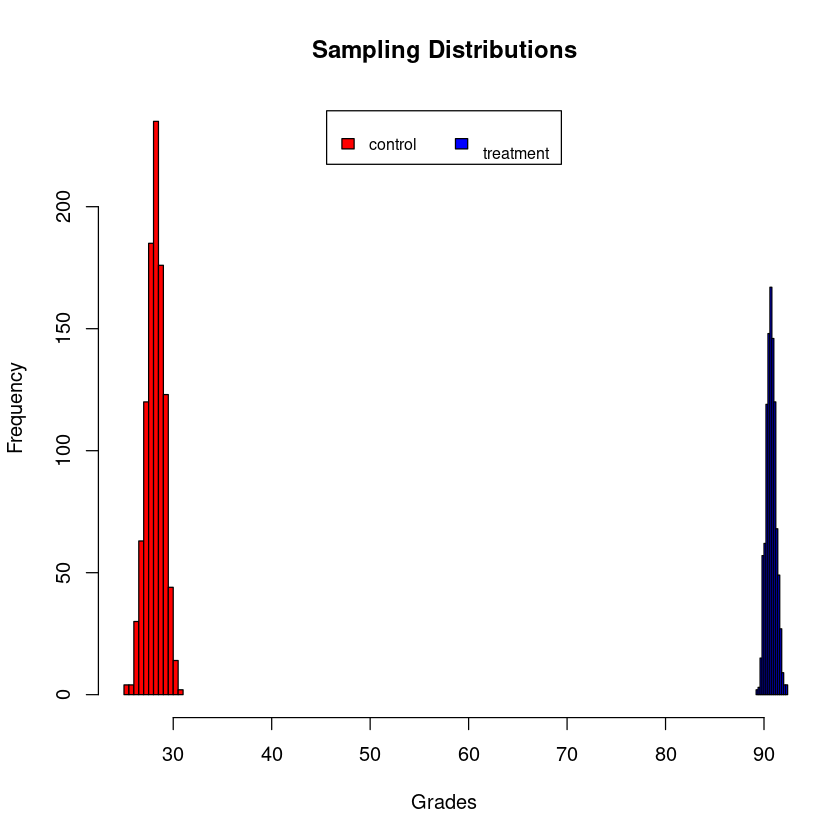

In [11]:
#Run this Cell
treatment_means <- as.numeric()
control_means <- as.numeric()

# We run this 1000 times
for (i in 1:1000){
    section_experiment_draw_1000 <- section_experiment
    # We randomly assign people to the two groups here
    section_experiment_draw_1000$assignment <- sample(c(rep("section", 150), rep("nosection", 150)), replace = F)
    # Create a new variable representing what we would observe
    section_experiment_draw_1000$po_observed <- ifelse(section_experiment_draw_1000$assignment == "section", section_experiment_draw_1000$po_treatment,
                                        section_experiment_draw_1000$po_control)
    # Get rid of the potential outcome variables that we can't actually observe
    section_experiment_draw_1000$po_treatment <- NULL
    section_experiment_draw_1000$po_control <- NULL
    section_exp_section_tmp <- subset(section_experiment_draw_1000, assignment == "section")
    section_exp_nosection_tmp <- subset(section_experiment_draw_1000, assignment == "nosection")
    treatment_means[i] <- mean(section_exp_section_tmp$po_observed)
    control_means[i] <- mean(section_exp_nosection_tmp$po_observed)

}

hist(control_means, xlim = c(25, 90), main = "Sampling Distributions", xlab = "Grades", col = "red")
hist(treatment_means, col = "blue", add = T)
legend("top", inset=.02, c("control","
treatment"), fill=c("red", "blue"), horiz=TRUE, cex=0.8)